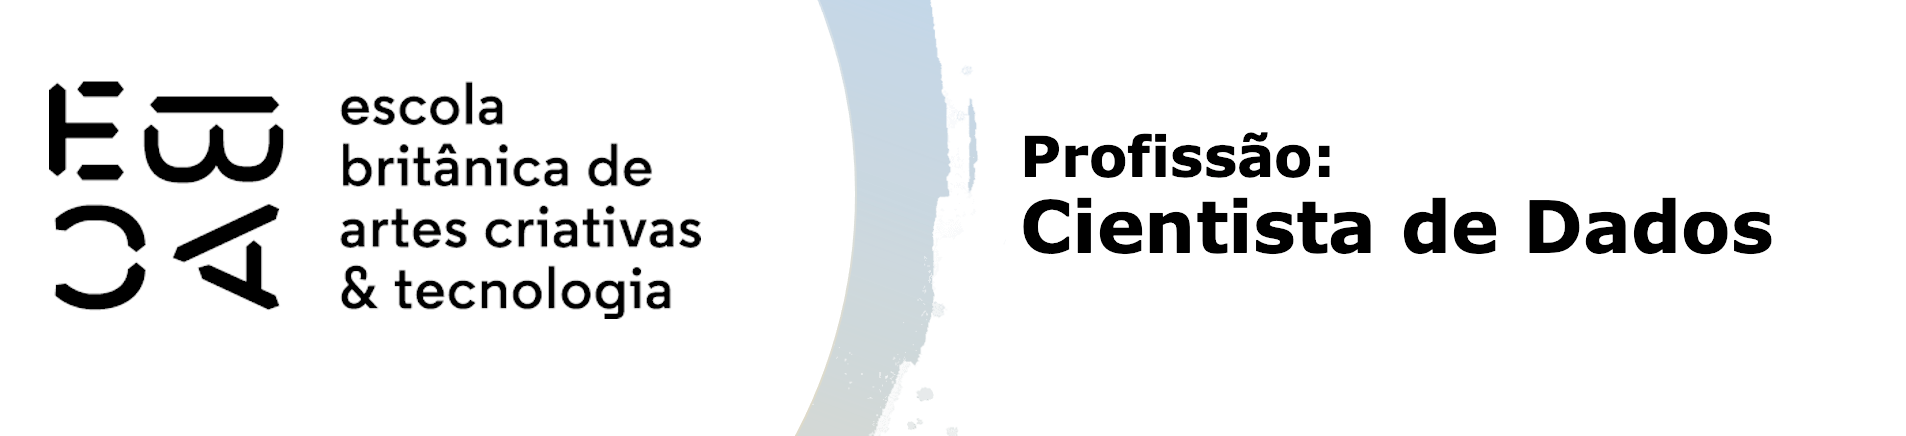

# Métodos hierárquicos de agrupamento - Tarefa

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [188]:
peng = sns.load_dataset('penguins')
peng.index.name='id'

In [189]:
peng.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [190]:
peng_num = peng.select_dtypes(include='number').dropna()

In [231]:
species_labels = peng['species']
species_labels

id
0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [191]:
ss = StandardScaler()
peng_pad = ss.fit_transform(peng_num)

In [192]:
pd.DataFrame(peng_pad)

,0,1,2,3
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175
338,0.527932,-1.445897,1.003109,0.809516
339,1.188289,-0.735923,1.501644,1.933419
340,0.234440,-1.192335,0.789451,1.246590


In [193]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

In [194]:
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [195]:
peng_num['grupo'] = clus.labels_
peng_num.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [196]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

In [223]:
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0.0


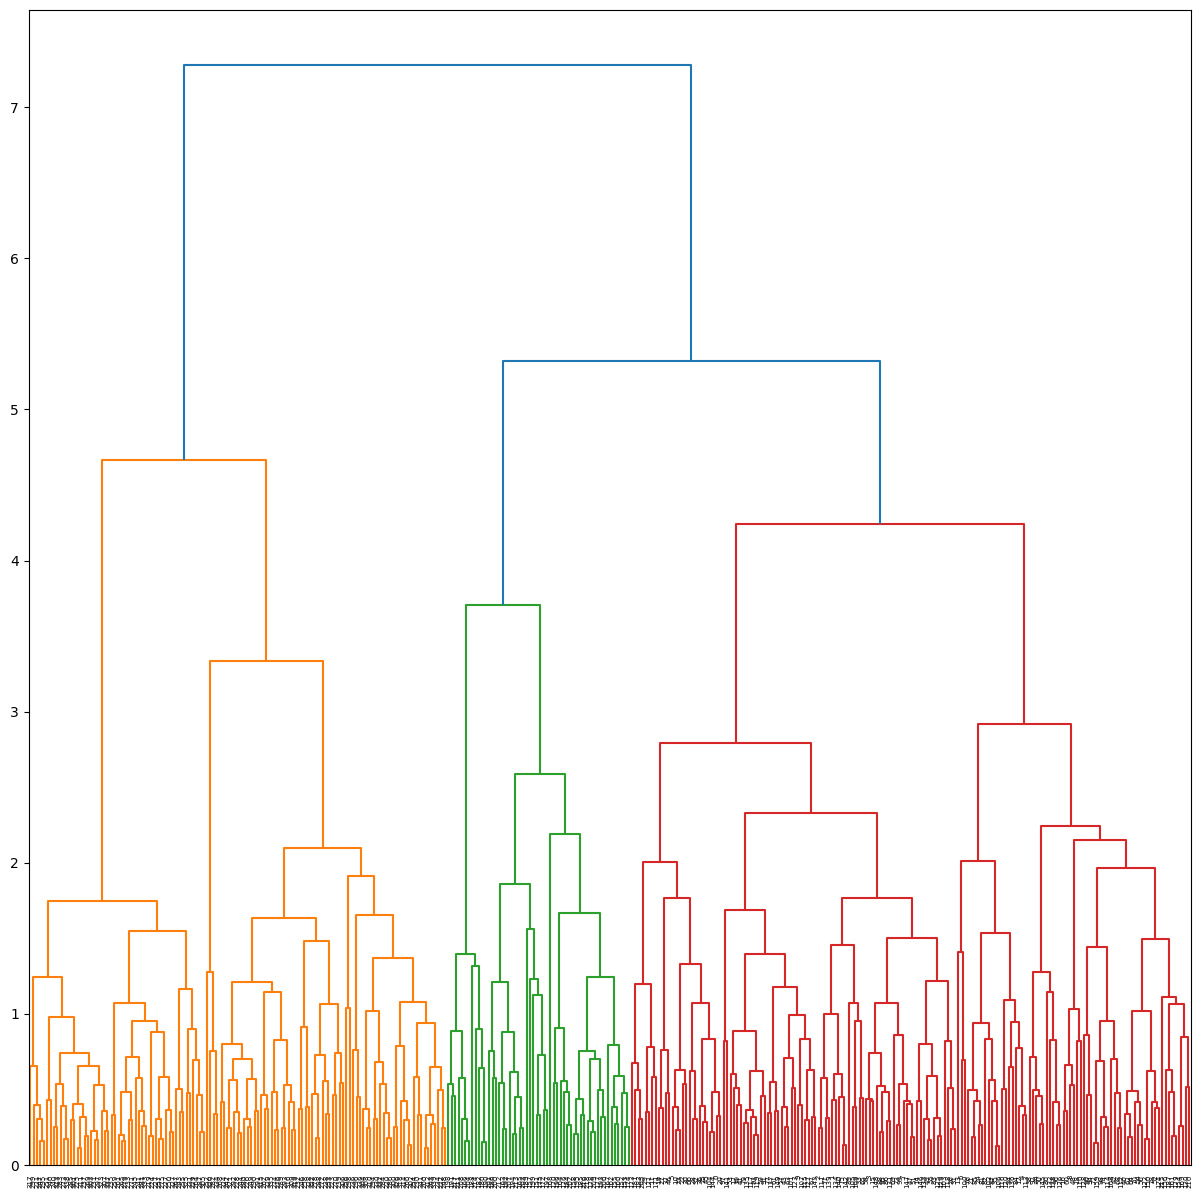

In [198]:
plt.figure(figsize=(15, 15))
linkage_matrix = shc.linkage(peng_pad, method='complete')
dend = shc.dendrogram(linkage_matrix)

In [199]:
clusters = shc.fcluster(linkage_matrix, t=3, criterion='maxclust')
cluster_df = pd.DataFrame(clusters, columns=['Cluster'])

In [200]:
cluster_counts = cluster_df['Cluster'].value_counts().sort_index()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [202]:
cluster_counts

Cluster
1    123
2     54
3    165
Name: count, dtype: int64

In [241]:
peng_display = pd.DataFrame({
    'Cluster': clusters,
})

peng_display.index.name='id'

peng_display = peng_display.merge(species_labels, how='left', on='id')

In [243]:
peng_display

,Cluster,species
id,,
0,3,Adelie
1,3,Adelie
2,3,Adelie
3,3,Adelie
4,3,Adelie
...,...,...
337,1,Gentoo
338,1,Gentoo
339,1,Gentoo


In [245]:
grouped = peng_display.groupby('Cluster').describe()

In [247]:
grouped

species                       
          count unique        top freq
Cluster                               
1           123      2     Gentoo  122
2            54      2  Chinstrap   53
3           165      2     Adelie  151

In [251]:
pd.crosstab(peng_display['species'], peng_display['Cluster'])

Cluster,1,2,3
species,,,
Adelie,0,1,151
Chinstrap,1,53,14
Gentoo,122,0,0


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [332]:
peng = sns.load_dataset('penguins')
peng.dropna(inplace=True)
features = peng[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [334]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [336]:
clustering = AgglomerativeClustering(n_clusters=4)
clusters = clustering.fit_predict(scaled_features)

In [338]:
peng['cluster'] = clusters

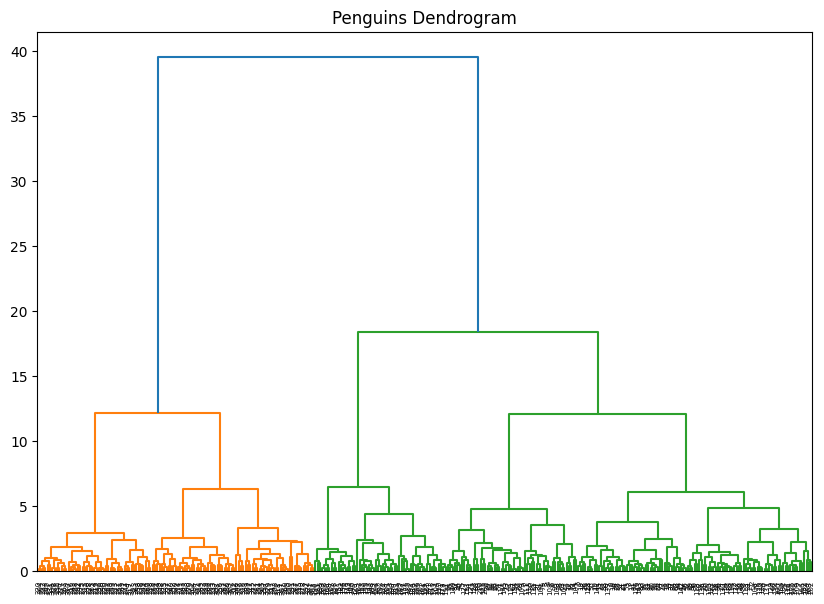

In [340]:
plt.figure(figsize=(10, 7))
plt.title("Penguins Dendrogram")
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))
plt.show()

#### O dendrograma sugere 2 grupos

In [342]:
species_cluster_counts = peng.groupby(['cluster', 'species']).size().reset_index(name='count')

In [343]:
species_cluster_counts

,cluster,species,count
0,0,Adelie,146
1,0,Chinstrap,11
2,1,Gentoo,70
3,2,Chinstrap,57
4,3,Gentoo,49


In [347]:
species_sex_cluster_counts = peng.groupby(['cluster', 'species', 'sex']).size().reset_index(name='count')

species_sex_cluster_counts

,cluster,species,sex,count
0,0,Adelie,Female,73
1,0,Adelie,Male,73
2,0,Chinstrap,Female,11
3,1,Gentoo,Female,9
4,1,Gentoo,Male,61
5,2,Chinstrap,Female,23
6,2,Chinstrap,Male,34
7,3,Gentoo,Female,49
